# load necessary pacakges

In [2]:
import sys
import anndata

# the path to the scVI github repo https://github.com/YosefLab/scVI
# sys.path.append('/data/yosef2/users/chenling/scVI/')
sys.path.append('/home/angela/src/scVI_TSP/')

# the path to tabulasapiens github repo https://github.com/czbiohub/tabula-sapiens
# sys.path.append('/data/yosef2/users/chenling/tabula-sapiens/')
sys.path.append('/home/angela/sapiens/tabula-sapiens/')


from scvi.dataset import AnnDatasetFromAnnData
from utils.annotations_utils import *
from anndata import read_h5ad
import scanpy as sc
sc.

# if a model has been trained load pretrained model rather than retraining
retrain=False


/home/angela/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [3]:
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
%matplotlib inline

In [4]:
# data_path = '/data/yosef2/users/chenling/TabulaSapiensData/'
# model_path = '/data/yosef2/users/chenling/TabulaSapiens/scVImodels/Pilot2_nova2/'
# res_path = '/data/yosef2/users/chenling/TabulaSapiens/Pilot2_rerun/'

data_path = '/mnt/ibm_lg/angela/sapiens/data/'
model_path = '/mnt/ibm_lg/angela/sapiens/data/scVI_models/'
res_path = '/mnt/ibm_lg/angela/sapiens/data/'

# if not os.path.exists(model_path):
#     os.mkdir(model_path)
# if not os.path.exists(model_path+'scanvi/'):
#     os.mkdir(model_path+'scanvi/')
# if not os.path.exists(res_path):
#     os.mkdir(res_path)

In [5]:
def FindUniqueCells(tenx): 
    barcodes = tenx.obs.index
    barcodes = [x.split('-')[0] for x in barcodes]

    unique_barcodes, count = np.unique(barcodes, return_counts=True)
    is_unique = [x in unique_barcodes[count==1] for x in barcodes]
    return(is_unique)



# Data to use

In [461]:
tsp1_10x = sc.read_h5ad(
    "/mnt/ibm_lg/angela/sapiens/TSP1/TSP1-10X-min_genes_200-min_reads_2500.h5ad")
display(tsp1_10x)

tsp1_ss2 = sc.read_h5ad(
    "/mnt/ibm_lg/angela/sapiens/TSP1/smartseq2/TSP1_SS2_gencode_filtered_raw.h5ad")
display(tsp1_ss2)

tsp2_10x = sc.read_h5ad(
    "/mnt/ibm_lg/angela/sapiens/TSP2/TSP2-10X-novaseq_rerun-nextseq-min_genes_200-min_reads_2500.h5ad")
display(tsp2_10x)

tsp2_ss2 = sc.read_h5ad(
    "/mnt/ibm_lg/angela/sapiens/TSP2/smartseq2/TSP2_SS2_no_official_metadata_filtered_raw.h5ad")
display(tsp2_ss2)


AnnData object with n_obs × n_vars = 44199 × 58870 
    obs: '10X_run', 'n_counts', 'n_genes', 'replicate', 'tissue', 'method', 'sequencer', 'pilot', 'sex'
    var: 'gene_ids', 'feature_types'

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 4460 × 58962 
    obs: 'plate', 'well_seq', 'cell_id', 'well_metadata', 'cDNAPlate', 'LibraryPlateID', 'Tissue', 'PrimarySort', 'AnatomicalPosition', 'SortOrder', 'Well_Range', 'Excluded', 'SortDirection', 'Investigator', 'Barcode', 'cDNA Prep', 'cDNA Dilute', 'library prep', 'lib prep date', 'bead cleanup', 'BA nM', 'NovaSeqRun', 'Additional Notes', 'n_genes', 'n_counts'
    var: 'ensembl_id', 'ensembls', 'query', '_id', '_score', 'entrezgene', 'name', 'taxid', 'notfound', 'n_cells'

AnnData object with n_obs × n_vars = 154053 × 58870 
    obs: '10X_run', 'method', 'n_counts', 'n_genes', 'notes', 'pilot', 'replicate', 'sample', 'sequencer', 'subtissue', 'tissue', 'sex'
    var: 'gene_ids', 'feature_types'

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 3991 × 58962 
    obs: 'pilot', 'Tissue', 'AnatomicalPosition', 'method', 'cDNAPlate', 'LibraryPlateID', 'population', 'well_seq', 'cell_id', 'n_genes', 'n_counts'
    var: 'ensembl_id', 'ensembls', 'query', '_id', '_score', 'entrezgene', 'name', 'taxid', 'notfound', 'n_cells'

# read pilot1 data

## filter duplicated barcodes in 10X

In [462]:
display(tsp1_10x.shape)
idx = np.asarray(FindUniqueCells(tsp1_10x))
tsp1_10x = tsp1_10x[idx].copy()
display(tsp1_10x.shape)

(44199, 58870)

(43457, 58870)

In [435]:
# pilot1_datapath = data_path+'Pilot1/'
# tenx = read_h5ad(pilot1_datapath + 'tabula-sapiens-10X-pilot-filtered.h5ad')

# sc.pp.filter_cells(tenx, min_genes=200)
# display(tenx)
# sc.pp.filter_cells(tenx, min_counts=2500)
# display(tenx)
# sc.pp.filter_genes(tenx, min_cells=1)
# display(tenx)

# # idx = np.asarray(FindUniqueCells(pilot1))
# # np.save(arr=idx, file=data_path + 'TSP1.10x.index_hopping_filter.npy')
# idx = np.load(file=data_path + 'TSP1.10x.index_hopping_filter.npy')
# tenx = tenx[idx]
# display(tenx)

In [436]:
# ss2 = read_h5ad(pilot1_datapath + 'tabula-sapiens-facs-pilot-filtered.h5ad')
# sc.pp.filter_cells(ss2, min_genes=200)
# display(ss2)
# sc.pp.filter_cells(ss2, min_counts=2500)
# display(ss2)
# sc.pp.filter_genes(ss2, min_cells=1)
# display(ss2)

## concatenate both technologies

In [463]:
tsp1_ss2.var

,ensembl_id,ensembls,query,_id,_score,entrezgene,name,taxid,notfound,n_cells
symbol,,,,,,,,,,
AC004980.3,ENSG00000230305.2,ENSG00000230305,ENSG00000230305,ENSG00000230305,37.25699,nan,nan,9606.0,nan,583
AL451054.3,ENSG00000278180.1,ENSG00000278180,ENSG00000278180,ENSG00000278180,37.25699,nan,nan,9606.0,nan,68
AC114803.1,ENSG00000230432.1,ENSG00000230432,ENSG00000230432,ENSG00000230432,37.25699,nan,nan,9606.0,nan,755
AC026410.4,ENSG00000251828.1,ENSG00000251828,ENSG00000251828,ENSG00000251828,37.25699,nan,nan,9606.0,nan,235
AL591926.6,ENSG00000278028.1,ENSG00000278028,ENSG00000278028,ENSG00000278028,37.25699,nan,nan,9606.0,nan,158
...,...,...,...,...,...,...,...,...,...,...
ERCC-00164,ERCC-00164,ERCC-00164,ERCC-00164,nan,NaN,nan,nan,NaN,True,4
ERCC-00165,ERCC-00165,ERCC-00165,ERCC-00165,nan,NaN,nan,nan,NaN,True,165
ERCC-00168,ERCC-00168,ERCC-00168,ERCC-00168,nan,NaN,nan,nan,NaN,True,3


In [464]:
tsp1_10x.var

,gene_ids,feature_types
DDX11L1,ENSG00000223972.5,Gene Expression
WASH7P,ENSG00000227232.5,Gene Expression
MIR6859-1,ENSG00000278267.1,Gene Expression
MIR1302-2HG,ENSG00000243485.5,Gene Expression
MIR1302-2,ENSG00000284332.1,Gene Expression
...,...,...
MT-ND6,ENSG00000198695.2,Gene Expression
MT-TE,ENSG00000210194.1,Gene Expression
MT-CYB,ENSG00000198727.2,Gene Expression
MT-TT,ENSG00000210195.2,Gene Expression


In [465]:
tsp1_ss2.var['gene_symbol'] = tsp1_ss2.var.index
tsp1_10x.var['gene_symbol'] = tsp1_10x.var.index
tsp1_ss2.var = tsp1_ss2.var.set_index('ensembl_id')
tsp1_10x.var = tsp1_10x.var.set_index('gene_ids')

In [466]:
pilot1 = tsp1_10x.concatenate(tsp1_ss2)#,join='outer')
pilot1

AnnData object with n_obs × n_vars = 47917 × 58870 
    obs: '10X_run', 'Additional Notes', 'AnatomicalPosition', 'BA nM', 'Barcode', 'Excluded', 'Investigator', 'LibraryPlateID', 'NovaSeqRun', 'PrimarySort', 'SortDirection', 'SortOrder', 'Tissue', 'Well_Range', 'batch', 'bead cleanup', 'cDNA Dilute', 'cDNA Prep', 'cDNAPlate', 'cell_id', 'lib prep date', 'library prep', 'method', 'n_counts', 'n_genes', 'pilot', 'plate', 'replicate', 'sequencer', 'sex', 'tissue', 'well_metadata', 'well_seq'
    var: 'feature_types-0', 'gene_symbol-0', 'ensembls-1', 'query-1', '_id-1', '_score-1', 'entrezgene-1', 'name-1', 'taxid-1', 'notfound-1', 'n_cells-1', 'gene_symbol-1'

In [467]:
pilot1.var

,feature_types-0,gene_symbol-0,ensembls-1,query-1,_id-1,_score-1,entrezgene-1,name-1,taxid-1,notfound-1,n_cells-1,gene_symbol-1
ENSG00000223972.5,Gene Expression,DDX11L1,ENSG00000223972,ENSG00000223972,ENSG00000223972,28.898235,nan,DEAD/H-box helicase 11 like 1,9606.0,nan,5,DDX11L1
ENSG00000227232.5,Gene Expression,WASH7P,ENSG00000227232,ENSG00000227232,ENSG00000227232,10.178344,nan,"WASP family homolog 7, pseudogene",9606.0,nan,65,WASH7P
ENSG00000278267.1,Gene Expression,MIR6859-1,ENSG00000278267,ENSG00000278267,ENSG00000278267,32.521180,nan,microRNA 6859-1,9606.0,nan,3,MIR6859-1
ENSG00000243485.5,Gene Expression,MIR1302-2HG,ENSG00000243485,ENSG00000243485,ENSG00000243485,30.583565,nan,MIR1302-2 host gene,9606.0,nan,8,MIR1302-2HG
ENSG00000284332.1,Gene Expression,MIR1302-2,ENSG00000284332,ENSG00000284332,ENSG00000284332,32.521130,nan,microRNA 1302-2,9606.0,nan,1,MIR1302-2
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695.2,Gene Expression,MT-ND6,ENSG00000198695,ENSG00000198695,4541,6.408524,4541,"NADH dehydrogenase, subunit 6 (complex I)",9606.0,nan,49,ND6
ENSG00000210194.1,Gene Expression,MT-TE,ENSG00000210194,ENSG00000210194,ENSG00000210194,29.732050,nan,mitochondrially encoded tRNA-Glu (GAA/G),9606.0,nan,54,MT-TE
ENSG00000198727.2,Gene Expression,MT-CYB,ENSG00000198727,ENSG00000198727,4519,4.934534,4519,cytochrome b,9606.0,nan,6,CYTB
ENSG00000210195.2,Gene Expression,MT-TT,ENSG00000210195,ENSG00000210195,ENSG00000210195,30.607166,nan,mitochondrially encoded tRNA-Thr (ACN),9606.0,nan,21,MT-TT


In [468]:
pilot1.write_h5ad(data_path + 'Pilot1_filtered_ensembl_id.h5ad')

... storing '10X_run' as categorical
... storing 'Additional Notes' as categorical
... storing 'AnatomicalPosition' as categorical
... storing 'Barcode' as categorical
... storing 'Excluded' as categorical
... storing 'Investigator' as categorical
... storing 'LibraryPlateID' as categorical
... storing 'NovaSeqRun' as categorical
... storing 'PrimarySort' as categorical
... storing 'SortDirection' as categorical
... storing 'SortOrder' as categorical
... storing 'Tissue' as categorical
... storing 'Well_Range' as categorical
... storing 'bead cleanup' as categorical
... storing 'cDNA Dilute' as categorical
... storing 'cDNA Prep' as categorical
... storing 'cDNAPlate' as categorical
... storing 'cell_id' as categorical
... storing 'lib prep date' as categorical
... storing 'library prep' as categorical
... storing 'method' as categorical
... storing 'pilot' as categorical
... storing 'plate' as categorical
... storing 'replicate' as categorical
... storing 'sequencer' as categorical
..

# read pilot2 data

In [11]:
# pilot2_datapath = data_path+'Pilot2/'
# tenx = read_h5ad(pilot2_datapath + 'tsp2_10X_raw_novaseq_rerun_with_nextseq.h5ad')

# sc.pp.filter_cells(tenx, min_genes=200)
# display(tenx)
# sc.pp.filter_cells(tenx, min_counts=2500)
# display(tenx)
# sc.pp.filter_genes(tenx, min_cells=1)
# display(tenx)

# # idx = np.asarray(FindUniqueCells(pilot2))
# # np.save(arr=idx, file=data_path + 'TSP2.10x.index_hopping_filter.npy')
# idx = np.load(file=data_path + 'TSP2.10x.index_hopping_filter.npy')
# tenx = tenx[idx]
# display(tenx)

In [12]:
# ss2 = read_h5ad(pilot2_datapath + 'TSP2_SS2_no_official_metadata_filtered_raw.h5ad')
# display(ss2)
# sc.pp.filter_cells(ss2, min_genes=200)
# display(ss2)
# sc.pp.filter_cells(ss2, min_counts=2500)
# display(ss2)
# sc.pp.filter_genes(ss2, min_cells=1)
# display(ss2)

In [13]:
# ss2.var['gene_ids'] = ss2.var['ensembl_id']
# ss2.var = ss2.var[['gene_ids', 'n_cells']]
# tenx.var = tenx.var[['gene_ids', 'n_cells']]

In [469]:
display(tsp2_10x)
tsp2_10x_nova = tsp2_10x[tsp2_10x.obs['sequencer']=='novaseq'].copy()
display(tsp2_10x_nova)
idx1 = np.asarray(FindUniqueCells(tsp2_10x_nova))
tsp2_10x_nova = tsp2_10x_nova[idx1].copy()
display(tsp2_10x_nova)

tsp2_10x_next = tsp2_10x[tsp2_10x.obs['sequencer']=='nextseq'].copy()
display(tsp2_10x_next)
idx2 = np.asarray(FindUniqueCells(tsp2_10x_next))
tsp2_10x_next = tsp2_10x_next[idx2].copy()
display(tsp2_10x_next)

tsp2_10x = tsp2_10x_nova.concatenate(tsp2_10x_next).copy()
display(tsp2_10x)

AnnData object with n_obs × n_vars = 154053 × 58870 
    obs: '10X_run', 'method', 'n_counts', 'n_genes', 'notes', 'pilot', 'replicate', 'sample', 'sequencer', 'subtissue', 'tissue', 'sex'
    var: 'gene_ids', 'feature_types'

AnnData object with n_obs × n_vars = 151483 × 58870 
    obs: '10X_run', 'method', 'n_counts', 'n_genes', 'notes', 'pilot', 'replicate', 'sample', 'sequencer', 'subtissue', 'tissue', 'sex'
    var: 'gene_ids', 'feature_types'

AnnData object with n_obs × n_vars = 145691 × 58870 
    obs: '10X_run', 'method', 'n_counts', 'n_genes', 'notes', 'pilot', 'replicate', 'sample', 'sequencer', 'subtissue', 'tissue', 'sex'
    var: 'gene_ids', 'feature_types'

AnnData object with n_obs × n_vars = 2570 × 58870 
    obs: '10X_run', 'method', 'n_counts', 'n_genes', 'notes', 'pilot', 'replicate', 'sample', 'sequencer', 'subtissue', 'tissue', 'sex'
    var: 'gene_ids', 'feature_types'

AnnData object with n_obs × n_vars = 2568 × 58870 
    obs: '10X_run', 'method', 'n_counts', 'n_genes', 'notes', 'pilot', 'replicate', 'sample', 'sequencer', 'subtissue', 'tissue', 'sex'
    var: 'gene_ids', 'feature_types'

AnnData object with n_obs × n_vars = 148259 × 58870 
    obs: '10X_run', 'batch', 'method', 'n_counts', 'n_genes', 'notes', 'pilot', 'replicate', 'sample', 'sequencer', 'sex', 'subtissue', 'tissue'
    var: 'gene_ids', 'feature_types'

In [470]:
tsp2_ss2.var

,ensembl_id,ensembls,query,_id,_score,entrezgene,name,taxid,notfound,n_cells
symbol,,,,,,,,,,
AC027334.1,ENSG00000271230.1,ENSG00000271230,ENSG00000271230,ENSG00000271230,37.270454,nan,nan,9606.0,nan,362
AL138966.1,ENSG00000271559.1,ENSG00000271559,ENSG00000271559,ENSG00000271559,37.270454,nan,nan,9606.0,nan,19
AC018714.1,ENSG00000271509.1,ENSG00000271509,ENSG00000271509,ENSG00000271509,37.270454,nan,nan,9606.0,nan,777
AL590065.1,ENSG00000271519.1,ENSG00000271519,ENSG00000271519,ENSG00000271519,37.270454,nan,nan,9606.0,nan,256
AC108868.1,ENSG00000231505.1,ENSG00000231505,ENSG00000231505,ENSG00000231505,37.270454,nan,nan,9606.0,nan,117
...,...,...,...,...,...,...,...,...,...,...
ERCC-00164,ERCC-00164,ERCC-00164,ERCC-00164,nan,NaN,nan,nan,NaN,True,1
ERCC-00165,ERCC-00165,ERCC-00165,ERCC-00165,nan,NaN,nan,nan,NaN,True,111
ERCC-00168,ERCC-00168,ERCC-00168,ERCC-00168,nan,NaN,nan,nan,NaN,True,0


In [471]:
tsp2_ss2.var['gene_symbol'] = tsp2_ss2.var.index
tsp2_10x.var['gene_symbol'] = tsp2_10x.var.index
tsp2_ss2.var = tsp2_ss2.var.set_index('ensembl_id')
tsp2_10x.var = tsp2_10x.var.set_index('gene_ids')

In [472]:
pilot2 = tsp2_10x.concatenate(tsp2_ss2)
pilot2

AnnData object with n_obs × n_vars = 152250 × 58870 
    obs: '10X_run', 'AnatomicalPosition', 'LibraryPlateID', 'Tissue', 'batch', 'cDNAPlate', 'cell_id', 'method', 'n_counts', 'n_genes', 'notes', 'pilot', 'population', 'replicate', 'sample', 'sequencer', 'sex', 'subtissue', 'tissue', 'well_seq'
    var: 'feature_types-0', 'gene_symbol-0', 'ensembls-1', 'query-1', '_id-1', '_score-1', 'entrezgene-1', 'name-1', 'taxid-1', 'notfound-1', 'n_cells-1', 'gene_symbol-1'

In [473]:
pilot2.write_h5ad(data_path + 'Pilot2_filtered_ensembl_id.h5ad')

... storing '10X_run' as categorical
... storing 'AnatomicalPosition' as categorical
... storing 'LibraryPlateID' as categorical
... storing 'Tissue' as categorical
... storing 'cDNAPlate' as categorical
... storing 'cell_id' as categorical
... storing 'method' as categorical
... storing 'notes' as categorical
... storing 'population' as categorical
... storing 'replicate' as categorical
... storing 'sample' as categorical
... storing 'sequencer' as categorical
... storing 'sex' as categorical
... storing 'subtissue' as categorical
... storing 'tissue' as categorical
... storing 'well_seq' as categorical
... storing 'gene_symbol-1' as categorical


# Combine all data

In [474]:
# pilot1 = sc.read_h5ad(data_path + 'Pilot1.filtered.h5ad')
# pilot2 = sc.read_h5ad(data_path + 'Pilot2.filtered.h5ad')

In [475]:
pilot1.obs['pilot'] = 'TSP1'
pilot2.obs['pilot'] = 'TSP2'

pilot1.obs = pilot1.obs.drop('batch',axis=1)
pilot2.obs = pilot2.obs.drop('batch',axis=1)

adata = pilot1.concatenate(pilot2)
adata

AnnData object with n_obs × n_vars = 200167 × 58870 
    obs: '10X_run', 'Additional Notes', 'AnatomicalPosition', 'BA nM', 'Barcode', 'Excluded', 'Investigator', 'LibraryPlateID', 'NovaSeqRun', 'PrimarySort', 'SortDirection', 'SortOrder', 'Tissue', 'Well_Range', 'batch', 'bead cleanup', 'cDNA Dilute', 'cDNA Prep', 'cDNAPlate', 'cell_id', 'lib prep date', 'library prep', 'method', 'n_counts', 'n_genes', 'notes', 'pilot', 'plate', 'population', 'replicate', 'sample', 'sequencer', 'sex', 'subtissue', 'tissue', 'well_metadata', 'well_seq'
    var: 'feature_types-0', 'gene_symbol-0', 'ensembls-1', 'query-1', '_id-1', '_score-1-0', 'entrezgene-1', 'name-1-0', 'taxid-1', 'notfound-1', 'n_cells-1-0', 'gene_symbol-1-0', '_score-1-1', 'name-1-1', 'n_cells-1-1', 'gene_symbol-1-1'

## NOT DONE FOR THE LAST RUN - Clean vars

In [476]:
adata.var.columns

Index(['feature_types-0', 'gene_symbol-0', 'ensembls-1', 'query-1', '_id-1',
       '_score-1-0', 'entrezgene-1', 'name-1-0', 'taxid-1', 'notfound-1',
       'n_cells-1-0', 'gene_symbol-1-0', '_score-1-1', 'name-1-1',
       'n_cells-1-1', 'gene_symbol-1-1'],
      dtype='object')

In [453]:
adata.var = adata.var[['feature_types-0-0-0', 'gene_ids-1-0-0', 'gene_symbol-0', 'ensembls-1', 
                       'query-1', '_id-1', '_score-1-0','entrezgene-1', 'name-1-0', 'taxid-1', 
                       'notfound-1', 'n_cells-1-0',
       'gene_symbol-1-0', 'feature_types-0-1', '_score-1-1', 'name-1-1',
       'n_cells-1-1', 'gene_symbol-1-1']]
adata.var.rename(columns = {'gene_ids-0-1' : "gene_id", 
                  'feature_types-0-1' : "feature_types", 
                  'ensembls-1-1' : "ensembl_id", 
                  '_score-1-1' : "mygene_score", 
                  'name-1-1' : "gene_name"},inplace=True)
adata.var

KeyError: "['gene_ids-0-1', 'ensembls-1-1'] not in index"

## Clean metadata

In [477]:
adata.obs.columns

Index(['10X_run', 'Additional Notes', 'AnatomicalPosition', 'BA nM', 'Barcode',
       'Excluded', 'Investigator', 'LibraryPlateID', 'NovaSeqRun',
       'PrimarySort', 'SortDirection', 'SortOrder', 'Tissue', 'Well_Range',
       'batch', 'bead cleanup', 'cDNA Dilute', 'cDNA Prep', 'cDNAPlate',
       'cell_id', 'lib prep date', 'library prep', 'method', 'n_counts',
       'n_genes', 'notes', 'pilot', 'plate', 'population', 'replicate',
       'sample', 'sequencer', 'sex', 'subtissue', 'tissue', 'well_metadata',
       'well_seq'],
      dtype='object')

In [478]:
adata.obs['sex'] = 'female'

adata.obs['method'].replace('droplet', '10X',inplace=True)
adata.obs['method'].replace('SS2', 'smartseq2',inplace=True)
adata.obs['method'].replace('nan', 'smartseq2',inplace=True)

adata.obs.loc[adata.obs['pilot']=='TSP1','sequencer'] = 'novaseq'
adata.obs.loc[adata.obs['method']=='smartseq2','sequencer'] = 'novaseq'

adata.obs['10X_run'] = adata.obs['10X_run']

adata.obs.loc[adata.obs['pilot']=='TSP1','notes'] = adata.obs.loc[adata.obs['pilot']=='TSP1','Additional Notes']

adata.obs.loc[adata.obs['pilot']=='TSP1','cDNAPlate'] = adata.obs.loc[adata.obs['pilot']=='TSP1','plate']

adata.obs.loc[adata.obs['pilot']=='TSP1','population'] = adata.obs.loc[adata.obs['pilot']=='TSP1','PrimarySort']

adata.obs.loc[adata.obs['method']=='smartseq2','tissue'] = adata.obs.loc[adata.obs['method']=='smartseq2','Tissue']

adata.obs.loc[adata.obs['subtissue'].isna(),'subtissue'] = adata.obs.loc[adata.obs['subtissue'].isna(),'AnatomicalPosition']

adata.obs['10X_barcode'] = [i.split("-")[0] for i in adata.obs.index]
adata.obs.loc[adata.obs['method']=='smartseq2','10X_barcode'] = 'nan'

adata.obs['aux_cell_id'] = adata.obs['10X_barcode'] + "_" + adata.obs['10X_run']
adata.obs.loc[adata.obs['cell_id']=='nan','cell_id'] = adata.obs.loc[adata.obs['cell_id']=='nan','aux_cell_id']


In [479]:
adata.obs.rename(columns = {'replicate':'10X_replicate',
                           'SortOrder':'smartseq2_sort_order',
                            'Barcode':'smartseq2_barcode',
                            'LibraryPlateID':'smartseq2_library_plate', #for TSP1, LibraryPlateID == cDNAPlate+Blue
                            'SortDirection':'smartseq2_sorting_direction',
                            'sample':'10X_sample',
                           'subtissue':'anatomical_position',
                           'cDNAPlate':'smartseq2_cDNA_Plate',
                           'population':'smartseq2_sorted_population',
                           'well_seq':'smartseq2_well_seq',
                           "pilot":"donor"}, 
                 inplace=True)

In [480]:
adata.obs = adata.obs.drop(
    ['BA nM','Excluded', 'Investigator','lib prep date', 'library prep',"NovaSeqRun",
    "bead cleanup","batch","cDNA Dilute",'cDNA Prep','Well_Range', 'Additional Notes','PrimarySort',
    "AnatomicalPosition","Tissue",'well_metadata','aux_cell_id','n_counts', 'n_genes','plate'], 
    axis = 1)

In [481]:
adata.obs.columns

Index(['10X_run', 'smartseq2_barcode', 'smartseq2_library_plate',
       'smartseq2_sorting_direction', 'smartseq2_sort_order',
       'smartseq2_cDNA_Plate', 'cell_id', 'method', 'notes', 'donor',
       'smartseq2_sorted_population', '10X_replicate', '10X_sample',
       'sequencer', 'sex', 'anatomical_position', 'tissue',
       'smartseq2_well_seq', '10X_barcode'],
      dtype='object')

In [482]:
adata.obs.replace('NA','nan',inplace=True)

In [483]:
adata = adata[adata.obs['tissue']!='nan'].copy()
adata.obs['tissue'] = adata.obs['tissue'].str.title()
for t in set(adata.obs['tissue']):
    if t in ['Endopancreas','Pancreasendocrine']:
        adata.obs.loc[adata.obs['tissue'] == t,'anatomical_position'] = 'Endocrine'
        adata.obs.loc[adata.obs['tissue'] == t,'tissue'] = 'Pancreas'
    if t in ['Pancreasexocrine']:
        adata.obs.loc[adata.obs['tissue'] == t,'anatomical_position'] = 'Exocrine'
        adata.obs.loc[adata.obs['tissue'] == t,'tissue'] = 'Pancreas'
    if t in ['Exopancreas1','Exopancreas2']:
        adata.obs.loc[adata.obs['tissue'] == t,'anatomical_position'] = 'Exocrine'
        adata.obs.loc[adata.obs['tissue'] == t,'smartseq2_sort_order'] = np.int(t.split('pancreas')[1])
        adata.obs.loc[adata.obs['tissue'] == t,'tissue'] = 'Pancreas'
    if t in ['Bm']:
        adata.obs.loc[adata.obs['tissue'] == t,'tissue'] = 'Bone_Marrow'
    if t in ['Li']:
        adata.obs.loc[adata.obs['tissue'] == t,'tissue'] = 'Large_Intestine'
    if t in ['Si']:
        adata.obs.loc[adata.obs['tissue'] == t,'tissue']='Small_Intestine'
    if t in ['Lymphnode']:
        adata.obs.loc[adata.obs['tissue'] == t,'tissue'] = 'Lymph_Node'

In [484]:
adata.obs.columns

Index(['10X_run', 'smartseq2_barcode', 'smartseq2_library_plate',
       'smartseq2_sorting_direction', 'smartseq2_sort_order',
       'smartseq2_cDNA_Plate', 'cell_id', 'method', 'notes', 'donor',
       'smartseq2_sorted_population', '10X_replicate', '10X_sample',
       'sequencer', 'sex', 'anatomical_position', 'tissue',
       'smartseq2_well_seq', '10X_barcode'],
      dtype='object')

In [485]:
pd.DataFrame(
    adata.obs.groupby(['sex','donor','tissue','anatomical_position','method',
                   '10X_run','10X_barcode',
                       'smartseq2_barcode',
                       'smartseq2_sorting_direction',
                       'smartseq2_sort_order',
                   'smartseq2_cDNA_Plate',
                   'smartseq2_library_plate',
                   'smartseq2_sorted_population',
                   'smartseq2_well_seq',
                   'sequencer','notes']
                 )['cell_id'].count()
)

cell_id
sex    donor tissue   anatomical_position method    10X_run        10X_barcode      smartseq2_barcode smartseq2_sorting_direction smartseq2_sort_order smartseq2_cDNA_Plate smartseq2_library_plate smartseq2_sorted_population smartseq2_well_seq sequencer notes                           
female TSP1  Bladder  nan                 10X       TSP1_bladder_1 AAACCCAGTGTAGCAG nan               nan                         nan                  nan                  nan                     nan                         nan                novaseq   nan                            1
                                                                   AAACCCATCAAGTCTG nan               nan                         nan                  nan                  nan                     nan                         nan                novaseq   nan                            1
                                                                   AAACCCATCCTTCGAC nan               nan                         nan                  nan                  nan                     nan                         nan                novaseq   nan                            1
                                                                   AAACCCATCGAAGGAC nan               nan                         nan                  nan                  nan                     nan                         nan                novaseq   nan                            1
                                                                   AAACGAAAGCTCCGAC nan               nan                         nan                  nan                  nan                     nan                         nan                novaseq   nan                            1
...                                                                                                                                                                                                                                                                                       ...
             Pancreas Exocrine            smartseq2 nan            nan              BC4               Row                         Plate 1              B107816              B107816Blue             Epithelial                  P11                novaseq   Short Dissociation Time        1
                                                                                                                                                                                                                                P19                novaseq   Short Dissociation Time        1
                                                                                                                                                                                                                                P2                 novaseq   Short Dissociation Time        1
                                                                                                                                                                                                                                P3                 novaseq   Short Dissociation Time        1
                                                                                                                                                                                                                                P9                 novaseq   Short Dissociation Time        1

[47915 rows x 1 columns]

In [487]:
pd.DataFrame(
    adata.obs.groupby(['tissue','anatomical_position']).count())

10X_run  smartseq2_barcode  \
tissue          anatomical_position                               
Bladder         nan                    25783              15100   
Blood           nan                    15551               4239   
Bone_Marrow     vertebralbody           2861                  0   
Fat             MAT                      115                  0   
                SCAT                     186                  0   
Heart           ventricle                269                  0   
Kidney          nan                    24124                  0   
Large_Intestine distal                  3990                  0   
                proximal                3829                  0   
Lung            MedialDistal             337                337   
                Proximal                 404                404   
                nan                    15272              14782   
                proxmedialdistal       20879                  0   
Lymph_Node      nan                     9122                  0   
Muscle          diaphragm               5075                  0   
                nan                     5156               4058   
                rectusabdominus        11335                  0   
Pancreas        Endocrine               2510               2510   
                Exocrine                6485               6485   
Skin            abdomen                    2                  0   
                nan                      877                  0   
Small_Intestine distal                   823                  0   
                nan                      477                  0   
                proximal                8123                  0   
Spleen          nan                     7853                  0   
Thymus          nan                    12501                  0   
Trachea         nan                     7915                  0   
Vasculature     Aorta                   8311                  0   

                                     smartseq2_library_plate  \
tissue          anatomical_position                            
Bladder         nan                                    25783   
Blood           nan                                    15551   
Bone_Marrow     vertebralbody                           2861   
Fat             MAT                                      115   
                SCAT                                     186   
Heart           ventricle                                269   
Kidney          nan                                    24124   
Large_Intestine distal                                  3990   
                proximal                                3829   
Lung            MedialDistal                             337   
                Proximal                                 404   
                nan                                    15272   
                proxmedialdistal                       20879   
Lymph_Node      nan                                     9122   
Muscle          diaphragm                               5075   
                nan                                     5156   
                rectusabdominus                        11335   
Pancreas        Endocrine                               2510   
                Exocrine                                6485   
Skin            abdomen                                    2   
                nan                                      877   
Small_Intestine distal                                   823   
                nan                                      477   
                proximal                                8123   
Spleen          nan                                     7853   
Thymus          nan                                    12501   
Trachea         nan                                     7915   
Vasculature     Aorta                                   8311   

                                     smartseq2_sorting_direction  \
tissue          anatomical_position  

## write files

In [488]:
adata.write(data_path + "Pilot1_Pilot2_filtered_ensembl_id.h5ad")

... storing '10X_run' as categorical
... storing 'smartseq2_barcode' as categorical
... storing 'smartseq2_library_plate' as categorical
... storing 'smartseq2_sorting_direction' as categorical
... storing 'smartseq2_sort_order' as categorical
... storing 'smartseq2_cDNA_Plate' as categorical
... storing 'method' as categorical
... storing 'notes' as categorical
... storing 'donor' as categorical
... storing 'smartseq2_sorted_population' as categorical
... storing '10X_replicate' as categorical
... storing '10X_sample' as categorical
... storing 'sequencer' as categorical
... storing 'sex' as categorical
... storing 'anatomical_position' as categorical
... storing 'tissue' as categorical
... storing 'smartseq2_well_seq' as categorical
... storing '10X_barcode' as categorical


In [489]:
adata.var

,feature_types-0,gene_symbol-0,ensembls-1,query-1,_id-1,_score-1-0,entrezgene-1,name-1-0,taxid-1,notfound-1,n_cells-1-0,gene_symbol-1-0,_score-1-1,name-1-1,n_cells-1-1,gene_symbol-1-1
ENSG00000223972.5,Gene Expression,DDX11L1,ENSG00000223972,ENSG00000223972,ENSG00000223972,28.898235,nan,DEAD/H-box helicase 11 like 1,9606.0,nan,5,DDX11L1,28.912962,DEAD/H-box helicase 11 like 1,0,DDX11L1
ENSG00000227232.5,Gene Expression,WASH7P,ENSG00000227232,ENSG00000227232,ENSG00000227232,10.178344,nan,"WASP family homolog 7, pseudogene",9606.0,nan,65,WASH7P,10.174388,"WASP family homolog 7, pseudogene",0,WASH7P
ENSG00000278267.1,Gene Expression,MIR6859-1,ENSG00000278267,ENSG00000278267,ENSG00000278267,32.521180,nan,microRNA 6859-1,9606.0,nan,3,MIR6859-1,32.540504,microRNA 6859-1,64,MIR6859-1
ENSG00000243485.5,Gene Expression,MIR1302-2HG,ENSG00000243485,ENSG00000243485,ENSG00000243485,30.583565,nan,MIR1302-2 host gene,9606.0,nan,8,MIR1302-2HG,30.603180,MIR1302-2 host gene,4,MIR1302-2HG
ENSG00000284332.1,Gene Expression,MIR1302-2,ENSG00000284332,ENSG00000284332,ENSG00000284332,32.521130,nan,microRNA 1302-2,9606.0,nan,1,MIR1302-2,32.539940,microRNA 1302-2,2,MIR1302-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695.2,Gene Expression,MT-ND6,ENSG00000198695,ENSG00000198695,4541,6.408524,4541,"NADH dehydrogenase, subunit 6 (complex I)",9606.0,nan,49,ND6,6.419775,"NADH dehydrogenase, subunit 6 (complex I)",8,ND6
ENSG00000210194.1,Gene Expression,MT-TE,ENSG00000210194,ENSG00000210194,ENSG00000210194,29.732050,nan,mitochondrially encoded tRNA-Glu (GAA/G),9606.0,nan,54,MT-TE,29.717407,mitochondrially encoded tRNA-Glu (GAA/G),20,MT-TE
ENSG00000198727.2,Gene Expression,MT-CYB,ENSG00000198727,ENSG00000198727,4519,4.934534,4519,cytochrome b,9606.0,nan,6,CYTB,4.942535,cytochrome b,7,CYTB
ENSG00000210195.2,Gene Expression,MT-TT,ENSG00000210195,ENSG00000210195,ENSG00000210195,30.607166,nan,mitochondrially encoded tRNA-Thr (ACN),9606.0,nan,21,MT-TT,30.630075,mitochondrially encoded tRNA-Thr (ACN),163,MT-TT


In [364]:
adata.obs.to_csv("sapiens_metadata.csv")

In [490]:
adata

AnnData object with n_obs × n_vars = 200165 × 58870 
    obs: '10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'notes', 'donor', 'smartseq2_sorted_population', '10X_replicate', '10X_sample', 'sequencer', 'sex', 'anatomical_position', 'tissue', 'smartseq2_well_seq', '10X_barcode'
    var: 'feature_types-0', 'gene_symbol-0', 'ensembls-1', 'query-1', '_id-1', '_score-1-0', 'entrezgene-1', 'name-1-0', 'taxid-1', 'notfound-1', 'n_cells-1-0', 'gene_symbol-1-0', '_score-1-1', 'name-1-1', 'n_cells-1-1', 'gene_symbol-1-1'

# NOT BEING USED - make unified meta data table

In [31]:
def CombineMeta(adata, meta, col1, col2, colname):
    col1 = adata.obs[col1].astype(str)
    col2 = adata.obs[col2].astype(str)
    if col2 is 'cell_id':
        temp = ['_'.join(x.split('_')[:-1]) for x in col2]
        col2 = np.asarray(temp)
    print('nan' not in np.unique(col1[col2=='nan']), 'nan' not in np.unique(col2[col1=='nan']))
    print(np.unique(col1[col2!='nan']), np.unique(col2[col1!='nan']))
    col = col1
    col[col1=='nan'] = col2[col1=='nan']
    meta[colname] = col
    return meta


def CheckRedundancy(adata, col1, col2):
    col1 = adata.obs[col1].astype(str)
    col2 = adata.obs[col2].astype(str)
    temp = []
    for x in np.unique(col1):
        print(x, np.unique(col2[col1==x]))
        temp.append(len(np.unique(col2[col1==x])))
    if(np.unique(temp)==1):
        print('redundnat')
    return 0

# NOT BEING USED - pilot 1 metadata

In [ ]:
meta1['sequencer'] = meta1['method']
meta1['sequencer'].replace('10X', 'novaseq',inplace=True)

meta1['n_counts'] = pilot1.obs['n_counts']
meta1['n_genes'] = pilot1.obs['n_genes']
meta1['notes'] = pilot1.obs['Additional Notes']

meta1['tissue'] = pilot1.obs['tissue']
for x in ['bladder', 'blood', 'endopancreas', 'exopancreas1', 'exopancreas2', 'lung','muscle']:
    X = x[0].upper() + x[1:]
    meta1['tissue'].replace(x, X, inplace=True)

meta1['subtissue'] = pilot1.obs['anatomical_position']

meta1['SS2_population'] = pilot1.obs['primary_sort']
meta1['SS2_LibraryPlateID'] = pilot1.obs['barcode'].astype(str)
meta1['SS2_cDNAPlate'] = pilot1.obs['plate'].astype(str)
meta1['SS2_well_seq'] = pilot1.obs['well'].astype(str)
meta1['SS2_well_group'] = pilot1.obs['well_group'].astype(str)
# columns only in 10x
meta1['10X_run'] = pilot1.obs['10X_plate']

tenx_summary = meta1.loc[meta1['method']=='10X',
                             ['pilot','tissue','subtissue','method','10X_run','notes']
                             ].apply(lambda x:"_".join(x), axis=1)

ss2_summary = meta1.loc[meta1['method']=='SS2',
                             ['pilot','tissue','subtissue','method','SS2_population',
                              'SS2_LibraryPlateID','SS2_cDNAPlate', 'SS2_well_seq','notes']
                            ].apply(lambda x:"_".join(x), axis=1)

meta1.loc[meta1['method']=='10X','summary'] = tenx_summary
meta1.loc[meta1['method']=='SS2','summary'] = ss2_summary



In [32]:
meta1 = pd.DataFrame(index = pilot1.obs.index)
meta1['pilot'] = 'TSP1'
meta1['sex'] = 'female'
meta1['method'] = pilot1.obs['method']
meta1['method'].replace('droplet', '10X',inplace=True)
meta1['method'].replace('nan', 'SS2',inplace=True)

meta1['sequencer'] = meta1['method']
meta1['sequencer'].replace('10X', 'novaseq',inplace=True)

meta1['n_counts'] = pilot1.obs['n_counts']
meta1['n_genes'] = pilot1.obs['n_genes']
meta1['notes'] = pilot1.obs['Additional Notes']

meta1['tissue'] = pilot1.obs['tissue']
for x in ['bladder', 'blood', 'endopancreas', 'exopancreas1', 'exopancreas2', 'lung','muscle']:
    X = x[0].upper() + x[1:]
    meta1['tissue'].replace(x, X, inplace=True)

meta1['subtissue'] = pilot1.obs['anatomical_position']

meta1['SS2_population'] = pilot1.obs['primary_sort']
meta1['SS2_LibraryPlateID'] = pilot1.obs['barcode'].astype(str)
meta1['SS2_cDNAPlate'] = pilot1.obs['plate'].astype(str)
meta1['SS2_well_seq'] = pilot1.obs['well'].astype(str)
meta1['SS2_well_group'] = pilot1.obs['well_group'].astype(str)
# columns only in 10x
meta1['10X_run'] = pilot1.obs['10X_plate']

tenx_summary = meta1.loc[meta1['method']=='10X',
                             ['pilot','tissue','subtissue','method','10X_run','notes']
                             ].apply(lambda x:"_".join(x), axis=1)

ss2_summary = meta1.loc[meta1['method']=='SS2',
                             ['pilot','tissue','subtissue','method','SS2_population',
                              'SS2_LibraryPlateID','SS2_cDNAPlate', 'SS2_well_seq','notes']
                            ].apply(lambda x:"_".join(x), axis=1)

meta1.loc[meta1['method']=='10X','summary'] = tenx_summary
meta1.loc[meta1['method']=='SS2','summary'] = ss2_summary



KeyError: 'additional_notes'

In [ ]:
for x in meta2.columns:
    print(x, np.unique(meta2[x].astype(str)), 
          np.unique(meta2.loc[meta2['method']=='10X',x].astype(str)),
          np.unique(meta2.loc[meta2['method']!='10X',x].astype(str))
         )
    print("\n")

In [ ]:
meta1.to_csv(data_path + 'Pilot1/'+'pilot1.meta.csv')

# NOT BEING USED - pilot 2 metadata

In [ ]:
pilot2 = read_h5ad(data_path + 'Pilot2/' + 'Pilot2.filtered.h5ad')

In [ ]:
meta2 = pd.DataFrame(index = pilot2.obs.index)
meta2['pilot'] = 'TSP2'
meta2['sex'] = 'female'
meta2['method'] = pilot2.obs['method']
meta2['n_counts'] = pilot2.obs['n_counts']
meta2['n_genes'] = pilot2.obs['n_genes']
meta2['notes'] = pilot2.obs['notes']
# combine columns
meta2 = CombineMeta(pilot2, meta2, 'sequencer', 'method', 'sequencer')
meta2 = CombineMeta(pilot2, meta2, 'Tissue', 'tissue', 'tissue')
meta2 = CombineMeta(pilot2, meta2, 'AnatomicalPosition', 'subtissue', 'subtissue')
meta2 = CombineMeta(pilot2, meta2, '10X_run', 'cell_id', 'summary')
# columns only in ss2
meta2['SS2_population'] = pilot2.obs['population']
meta2['SS2_LibraryPlateID'] = pilot2.obs['LibraryPlateID']
meta2['SS2_cDNAPlate'] = pilot2.obs['cDNAPlate']
meta2['SS2_well_seq'] = pilot2.obs['well_seq']
# columns only in 10x
meta2['10X_run'] = pilot2.obs['replicate']
meta2['10X_sample'] = pilot2.obs['sample']


In [ ]:
meta2.replace('NA','nan',inplace=True)

In [ ]:
meta2.to_csv(pilot2_datapath+'pilot2.meta.csv')

# NOT BEING USED - combined meta

In [ ]:
meta = pd.concat([meta1, meta2],axis=0)
meta['tissue tech'] = meta[['pilot','tissue','sequencer']].apply(lambda x:"_".join(x), axis=1)
meta['pilot tech'] = meta[['pilot','sequencer']].apply(lambda x:"_".join(x), axis=1)
remove = ['TSP2_Fat_nextseq', 'TSP2_Heart_novaseq','TSP2_Skin_SS2', 
          'TSP2_Skin_nextseq', 'TSP2_Kidney_SS2','TSP2_Kidney_novaseq']
remove = [x in remove for x in meta['tissue tech']]
remove = np.asarray(remove)
meta['remove'] = remove


In [ ]:
combined = pilot1.concatenate(pilot2)
combined.obs = meta

# Run scvi

In [491]:
def scVIdata_preprocess(combined, batch_col = 'Tissue Tech', label_col = 'scANVI Prediction By Organ'):
    tissue_tech_list = list(np.unique(combined.obs[batch_col]))
    batch_id = [tissue_tech_list.index(x) for x in combined.obs[batch_col]]
    combined.obs['batch'] = batch_id
    
    train_data = AnnDatasetFromAnnData(combined, batch_label='batch')
    labels = combined.obs[label_col]
    train_data.cell_types, train_data.labels = np.unique(labels, return_inverse=True)
    train_data.labels = train_data.labels.reshape(len(train_data.labels), 1)
    train_data.n_labels = len(train_data.cell_types)
    
    return train_data

In [492]:
def remove_cats(adata):

    cat_columns = adata.obs.select_dtypes(['category']).columns
    adata.obs[cat_columns] = adata.obs[cat_columns].astype(str)
    
    return adata

In [493]:
# model_path = '/data/yosef2/users/chenling/TabulaSapiens/scVImodels/'

In [494]:
train_data

GeneExpressionDataset object with n_cells x nb_genes = 200165 x 55715
    gene_attribute_names: 'gene_names'
    cell_attribute_names: 'local_vars', 'local_means', 'batch_indices', 'labels'
    cell_categorical_attribute_names: 'batch_indices', 'labels'

In [495]:
combined = adata.copy()
combined = remove_cats(combined)

In [496]:
combined

AnnData object with n_obs × n_vars = 200165 × 58870 
    obs: '10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'notes', 'donor', 'smartseq2_sorted_population', '10X_replicate', '10X_sample', 'sequencer', 'sex', 'anatomical_position', 'tissue', 'smartseq2_well_seq', '10X_barcode'
    var: 'feature_types-0', 'gene_symbol-0', 'ensembls-1', 'query-1', '_id-1', '_score-1-0', 'entrezgene-1', 'name-1-0', 'taxid-1', 'notfound-1', 'n_cells-1-0', 'gene_symbol-1-0', '_score-1-1', 'name-1-1', 'n_cells-1-1', 'gene_symbol-1-1'

In [497]:
sc.pp.filter_cells(combined,min_counts=0)
sc.pp.filter_cells(combined,min_genes=0)
sc.pp.filter_genes(combined,min_cells=0)

combined

AnnData object with n_obs × n_vars = 200165 × 58870 
    obs: '10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'notes', 'donor', 'smartseq2_sorted_population', '10X_replicate', '10X_sample', 'sequencer', 'sex', 'anatomical_position', 'tissue', 'smartseq2_well_seq', '10X_barcode', 'n_counts', 'n_genes'
    var: 'feature_types-0', 'gene_symbol-0', 'ensembls-1', 'query-1', '_id-1', '_score-1-0', 'entrezgene-1', 'name-1-0', 'taxid-1', 'notfound-1', 'n_cells-1-0', 'gene_symbol-1-0', '_score-1-1', 'name-1-1', 'n_cells-1-1', 'gene_symbol-1-1', 'n_cells'

In [498]:
combined.obs["donor_tissue_tech"] = combined.obs["donor"].astype(str) + "_" + combined.obs["tissue"].astype(str) + "_" + combined.obs["method"].astype(str)



In [499]:
combined.obs["donor_tech"] = combined.obs["donor"].astype(str) + "_" + combined.obs["method"].astype(str)

In [500]:
set(combined.obs["donor_tissue_tech"])

{'TSP1_Bladder_10X',
 'TSP1_Bladder_smartseq2',
 'TSP1_Blood_10X',
 'TSP1_Blood_smartseq2',
 'TSP1_Lung_10X',
 'TSP1_Lung_smartseq2',
 'TSP1_Muscle_10X',
 'TSP1_Muscle_smartseq2',
 'TSP1_Pancreas_10X',
 'TSP1_Pancreas_smartseq2',
 'TSP2_Bladder_10X',
 'TSP2_Bladder_smartseq2',
 'TSP2_Blood_10X',
 'TSP2_Bone_Marrow_10X',
 'TSP2_Fat_10X',
 'TSP2_Heart_10X',
 'TSP2_Kidney_10X',
 'TSP2_Kidney_smartseq2',
 'TSP2_Large_Intestine_10X',
 'TSP2_Lung_10X',
 'TSP2_Lung_smartseq2',
 'TSP2_Lymph_Node_10X',
 'TSP2_Muscle_10X',
 'TSP2_Muscle_smartseq2',
 'TSP2_Skin_10X',
 'TSP2_Skin_smartseq2',
 'TSP2_Small_Intestine_10X',
 'TSP2_Small_Intestine_smartseq2',
 'TSP2_Spleen_10X',
 'TSP2_Spleen_smartseq2',
 'TSP2_Thymus_10X',
 'TSP2_Trachea_10X',
 'TSP2_Vasculature_10X'}

In [501]:
combined.var_names

Index(['ENSG00000223972.5', 'ENSG00000227232.5', 'ENSG00000278267.1',
       'ENSG00000243485.5', 'ENSG00000284332.1', 'ENSG00000237613.2',
       'ENSG00000268020.3', 'ENSG00000240361.2', 'ENSG00000186092.6',
       'ENSG00000238009.6',
       ...
       'ENSG00000198886.2', 'ENSG00000210176.1', 'ENSG00000210184.1',
       'ENSG00000210191.1', 'ENSG00000198786.2', 'ENSG00000198695.2',
       'ENSG00000210194.1', 'ENSG00000198727.2', 'ENSG00000210195.2',
       'ENSG00000210196.2'],
      dtype='object', length=58870)

[2020-06-21 20:28:21,414] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2020-06-21 20:28:21,422] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
[2020-06-21 20:28:27,670] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2020-06-21 20:28:29,287] INFO - scvi.dataset.dataset | Downsampled from 200165 to 200165 cells


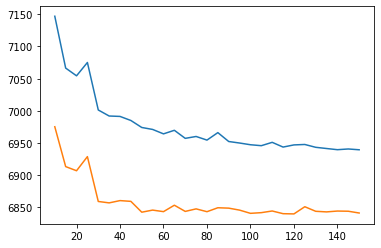

In [502]:
train_data = scVIdata_preprocess(combined, batch_col='donor_tissue_tech', label_col='tissue')

posterior = get_scvi_posterior(train_data, 
                               model_path+'Pilot12.all.ensembl_id.donor_tissue_tech.scVI.pkl', 
                               retrain=retrain)


In [503]:
latent = posterior.get_latent()
combined.obsm['X_scvi'] = latent[0]
sc.pp.neighbors(combined, n_neighbors=20, n_pcs=30, use_rep="X_scvi")
sc.tl.umap(combined)

... storing '10X_run' as categorical
... storing 'smartseq2_barcode' as categorical
... storing 'smartseq2_library_plate' as categorical
... storing 'smartseq2_sorting_direction' as categorical
... storing 'smartseq2_sort_order' as categorical
... storing 'smartseq2_cDNA_Plate' as categorical
... storing 'method' as categorical
... storing 'notes' as categorical
... storing 'donor' as categorical
... storing 'smartseq2_sorted_population' as categorical
... storing '10X_replicate' as categorical
... storing '10X_sample' as categorical
... storing 'sequencer' as categorical
... storing 'sex' as categorical
... storing 'anatomical_position' as categorical
... storing 'tissue' as categorical
... storing 'smartseq2_well_seq' as categorical
... storing '10X_barcode' as categorical
... storing 'donor_tissue_tech' as categorical
... storing 'donor_tech' as categorical


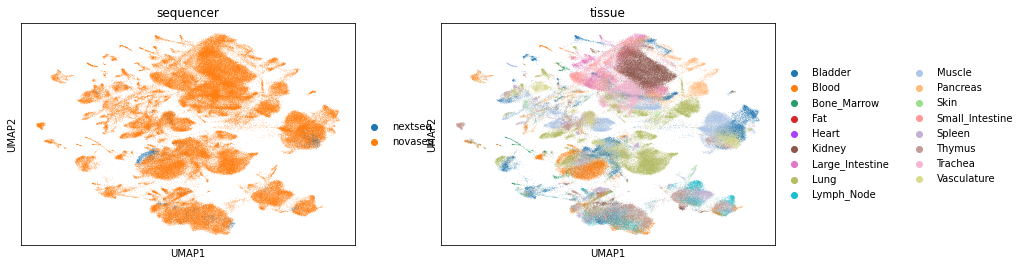

In [504]:
sc.pl.umap(combined, color=['sequencer','tissue'])

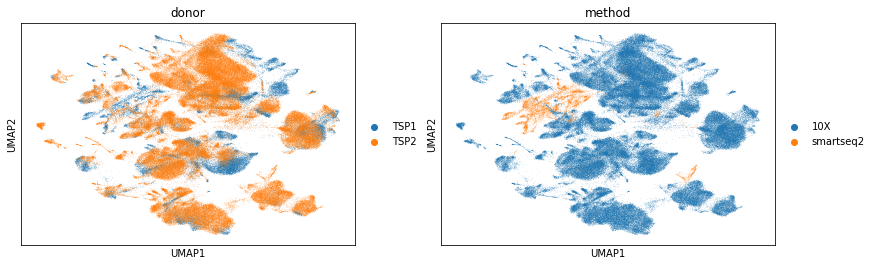

In [505]:
sc.pl.umap(combined, color=['donor','method'])

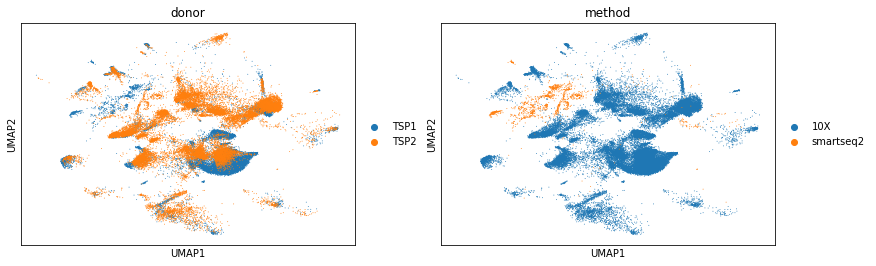

In [506]:
sc.pl.umap(combined[combined.obs['tissue']=='Lung'], color=['donor','method'])

In [404]:
combined.write_h5ad(data_path+"Pilot1_Pilot2_filtered_donor-tech_with-embedding.h5ad")

In [400]:
combined.obs.to_csv(data_path+"Pilot1_Pilot2_filtered_metadata.csv")

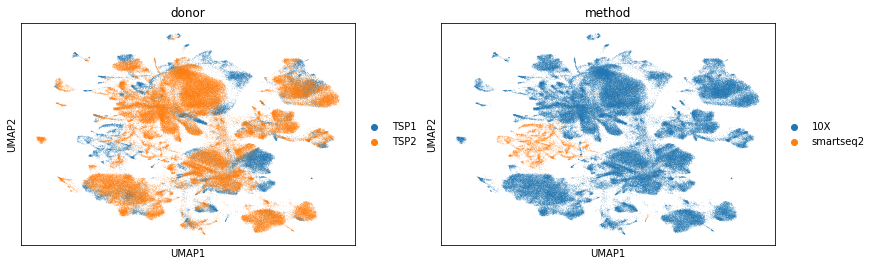

In [412]:
adata = sc.read_h5ad(data_path+"Pilot1_Pilot2_filtered_with-embedding.h5ad")
sc.pl.umap(adata, color=['donor','method'])

# NOT RUN - pilot tech

In [ ]:
train_data = scVIdata_preprocess(combined, batch_col='pilot tech', label_col='tissue')

In [ ]:
posterior = get_scvi_posterior(train_data, 
                               model_path+'Pilot12.all.pilot_tech.scVI.pkl', 
                               retrain=retrain)


In [ ]:
latent = posterior.get_latent()
combined.obsm['X_scvi'] = latent[0]
sc.pp.neighbors(combined, n_neighbors=20, n_pcs=30, use_rep="X_scvi")
sc.tl.umap(combined)

In [ ]:
sc.pl.umap(combined, color=['tissue','sequencer','pilot'], save='combined_pilot_sequencer.umap.pdf')

In [ ]:
data_path

In [ ]:
combined.write_h5ad(data_path + 'combined.pilot_sequencer.h5ad')

In [ ]:
meta = pd.read_csv(data_path+'combined.meta.ann.csv', index_col=0, dtype=str)
assert np.sum(combined.obs.index == meta.index) == len(meta.index)
combined.obs = meta

In [ ]:
combined.write_h5ad(data_path + 'combined.pilot_sequencer.ann.h5ad')

In [ ]:
sc.pl.umap(combined, color='manual_annotation', save='combined_pilot_sequencer.umap.manual_annotation.pdf')

In [ ]:
sc.pl.umap(combined, color='propagated_annotation', save='combined_pilot_sequencer.umap.propagated_annotation.pdf')